#           Nuclear Physics - UNIVERSITY OF LIVERPOOL - PHYS392

#### MOISES BARBERA RAMOS - STUDENT ID: 201168940 - 18/12/2019

This project shows a study of data from a sample of radioactive waste Eu152 in a range between 4200 to 8000 as well as a study of this same dataset in a range from 1 to 800.

Eu152 has a live time of 299.8 seconds.

This study culminates with a statistical analysis of the data set and my estimated MDAs (Minimum Detectable Activity (in Bequerels)) for the four lines (peaks) that I have identified.

In [1]:
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io import  loadmat
import pandas as pd
from scipy.stats import norm, chi2
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Study the mat file components
mat = loadmat('Eu152.mat', mat_dtype = True, squeeze_me = True)
mat

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov 13 10:42:35 2012',
 '__version__': '1.0',
 'channel2': array([1.000e+00, 2.000e+00, 3.000e+00, ..., 8.190e+03, 8.191e+03,
        8.192e+03]),
 'count2': array([0., 0., 0., ..., 0., 0., 0.]),
 'energy2': array([-6.74183700e-03,  2.32697859e-01,  4.72137555e-01, ...,
         1.96076493e+03,  1.96100437e+03,  1.96124381e+03])}

In [3]:
W = loadmat('Eu152.mat' , mat_dtype = True , squeeze_me = True)
locals().update({k : W[k] for k in ['channel2', 'count2', 'energy2']})

In [4]:
# create dataframe to inspect better given data
data = channel2, count2, energy2
data
df = pd.DataFrame(list(data))
df_transposed = df.T # Transposes dataframe leading to 3 columns only

headers = ['Channel', 'Count', 'Energy']  
df_transposed.columns = headers      # Change the header name of each colun

# After some calculations I found that around 21-29% of the counts in column count is 0
df_transposed.head()

,Channel,Count,Energy
0,1.0,0.0,-0.006742
1,2.0,0.0,0.232698
2,3.0,0.0,0.472138
3,4.0,0.0,0.711577
4,5.0,0.0,0.951017


In [5]:
# Data Range E between 4200 to 8000

df_range = df_transposed.iloc[4200:8001]
df_range.head()

,Channel,Count,Energy
4200,4201.0,30.0,1005.639982
4201,4202.0,19.0,1005.879421
4202,4203.0,5.0,1006.118861
4203,4204.0,5.0,1006.358301
4204,4205.0,7.0,1006.597740


In [6]:
# Detector efficiency and length of time the data were taken over
# Variables for Energy (keV) = efficiency

Energy_59_5 = 0.042293
Energy_88_0 = 0.047077 
Energy_1221_1 = 0.051100
Energy_165_9 = 0.042985
Energy_391_7 = 0.019621
Energy_661_7 = 0.012586
Energy_898_0 = 0.008659
Energy_1173_2 = 0.006979
Energy_1332_0 = 0.006235
Energy_1836_1 = 0.005067

In [42]:
# Channel only Range E between 4200 to 8000
Channel_range = channel2[4200:8001]

# Count only Range E between 4200 to 8000
Count_range = count2[4200:8001]

# Energy only Range E between 4200 to 8000
Energy_range = energy2[4200:8001]

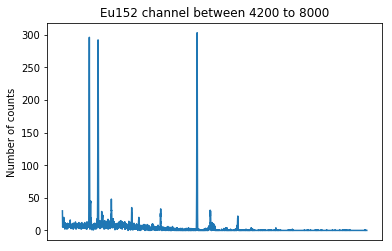

In [45]:
plt.plot(Channel_range, Count_range)         # Plot data with log in data y
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Eu152 channel between 4200 to 8000')
#plt.xlabel('Channel')
plt.ylabel('Number of counts')
plt.savefig("Eu152_4200_8000(2).png")

Text(0, 0.5, 'Number of counts (log)')

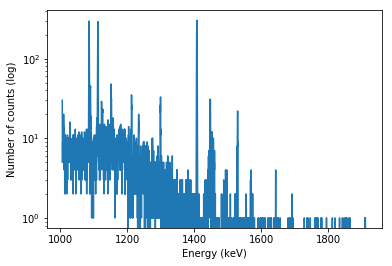

In [9]:
plt.semilogy(Energy_range, Count_range)
plt.xlabel('Energy (keV)')
plt.ylabel('Number of counts (log)')

In [10]:
# Defined a new model containing the Gaussian peak observed in the data + the background
def gaussian(x, A, mu, sigma, a, b):
    return A*np.exp(-((x-mu)**2) / (2*(sigma**2))) + np.mean(range_bg)

### Peak 1

In [11]:
# Peak 1
Channel_range_peak1 = channel2[4520:4560]
Count_range_peak1 = count2[4520:4560]
Energy_range_peak1 = energy2[4520:4560]

In [12]:
# Guessed values for [A, mu, sigma, a, b]
A = 300     
mu = 4538                       # guessed peak 
sigma = 2.5 
a = 4520
b = 9
range_bg = count2[4520:4530]    #guessed background

solu, cov = curve_fit(gaussian, Channel_range_peak1, Count_range_peak1, p0 = [A, mu, sigma, a, b])

# Fitted values for [A, mu, sigma, a, b]
A_fit = solu[0]
mu_fit = solu[1]
sigma_fit = solu [2]
a_fit = solu[3]
b_fit = solu[4]

# Print fitted values
print('Fit value for A is: {:.3f}, for mu is: {:.3f}, for sigma is: {:.3f}, for a is: {:.3f} and for b is: {:.3f} '
      .format(A_fit, mu_fit, sigma_fit, a_fit, b_fit))

# Print the gaussian fit and the data
#plt.plot(Channel_range_peak1,  gaussian(Channel_range_peak1, A_fit, mu_fit, sigma_fit, a_fit, b_fit), 'k--', label = 'Fitted peak model')

# Each chaannel separated by a 0.5 keV window so we can assume 0.5 error on channel
# Channel number = Energy/0.2393 + 0.2462
error_channel = 0.5
error_counts_1 = Count_range_peak1**0.5
#plt.errorbar(Channel_range_peak1, Count_range_peak1,  error_counts_1, error_channel, fmt = '.',  ecolor = 'r', label = 'data with error bars')

Fit value for A is: 268.137, for mu is: 4536.447, for sigma is: 2.404, for a is: 4520.000 and for b is: 9.000 


FWHM value = 5.7

C =  1267.0

B =  52.2

Net number of counts N = 1214.8


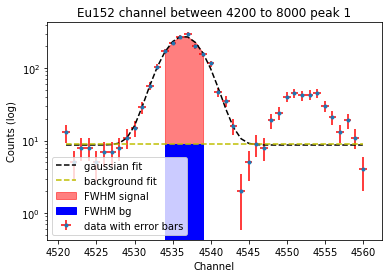

In [13]:
FWHM = 2*((2*np.log(2))**0.5)*sigma_fit
print('FWHM value = {:.1f}'.format(FWHM))
print('')

# Total number of counts
# Peak region
# FWHM approx. region
peak_reg = list(count2)[list(channel2).index(int(mu_fit)-int(FWHM/2)-1):list(channel2).index(int(mu_fit)+int(FWHM/2)+1)]
C = sum(peak_reg)
print('C = ', C)
print('')
# Counts bg
avg_bg = sum(range_bg)/len(range_bg)
B = avg_bg*len(peak_reg)
print('B = ', round(B,3))
print('')
# Net number of counts
N = C - B
print('Net number of counts N = {:.1f}'.format(N))

fill_reg = list(channel2)[int(mu_fit)-int(FWHM/2)-1:(int(mu_fit)+int(FWHM/2)+1)]
y2_fill = b_fit


plt.semilogy(Channel_range_peak1,gaussian(Channel_range_peak1, A_fit, mu_fit, sigma_fit, a_fit, b_fit), 'k--', label = 'gaussian fit')
plt.semilogy(Channel_range_peak1,[y2_fill]*len(Channel_range_peak1), 'y--', label = 'background fit')
plt.fill_between(fill_reg,gaussian(fill_reg, A_fit, mu_fit, sigma_fit, a_fit, b_fit), y2_fill, color='r', label = 'FWHM signal', alpha = 0.5)
plt.fill_between(fill_reg, y2_fill, color='b', label = 'FWHM bg')
plt.errorbar(Channel_range_peak1, Count_range_peak1,  error_counts_1, error_channel, fmt = '.',  ecolor = 'r', label = 'data with error bars')

plt.title('Eu152 channel between 4200 to 8000 peak 1')
plt.xlabel('Channel')
plt.ylabel('Counts (log)')
plt.legend()
plt.savefig("Eu152_4200_8000_peak1.png")
plt.show()

#### Critical Limit

In [14]:
# The critical limit for a confidence og 95% is given by:
Lc = 1.645*(2*B)**0.5
print('Critical Limit (Lc) = {:.3f}'.format(Lc))
print('')
print('As N > Lc - because {:.3f} > {:.3f}'.format(N, Lc))
print('')

#Confidence Limit
Sigma_N = (N + 2*B)**0.5
Conf_lim_err = 1.645*Sigma_N
print('Then the confidence limit = {:.3f} +/- {:.3f}'
      .format(N, Conf_lim_err))

Critical Limit (Lc) = 16.808

As N > Lc - because 1214.800 > 16.808

Then the confidence limit = 1214.800 +/- 59.748


#### Detection Limit

In [15]:
# for Kα = Kβ = 1.645

Ld = 2.71 + 4.65*(B)**0.5

print('Detection limit = {:.3f}'.format(Ld))

Detection limit = 36.306


#### MDA

In [16]:
# To know efficiency we need to know the energy range of our peak
print('Energy range peak 1 between ' + str(list(Energy_range_peak1)[0]) + ' and ' + str(list(Energy_range_peak1)[-1]))

Energy range peak 1 between 1082.260684 and 1091.598833


In [17]:
# Knowing the energy range we know the efficiency of accelerator is between Energy_898_0 and Energy_1173_2
eff_1 = 0.006979

# Live time for Eu152 (s)
t_Eu = 299.8

# Branching ratio assume f = 1
f = 1

# Minimum Detectable Activity
MDA = (Ld) / (t_Eu * eff_1 * f)

print('Minimum Detectable Activity = {:.3f} Bq'.format(MDA))

Minimum Detectable Activity = 17.352 Bq


### Peak 2

In [18]:
# Peak 2
Channel_range_peak2 = channel2[4620:4670]
Count_range_peak2 = count2[4620:4670]
Energy_range_peak2 = energy2[4620:4670]

Fit value for A is: 293.922, for mu is: 4645.934, for sigma is: 2.577, for a is: 4620.000 and for b is: 8.000 

FWHM value = 6.069

C =  1634.0

B =  63.2

Net number of counts = 1570.8


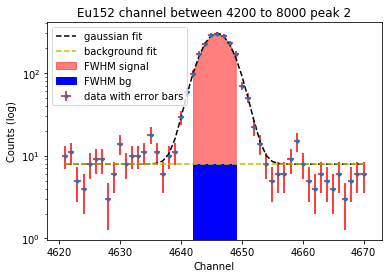

In [19]:
# Guessed values for [A, mu, sigma, a, b]
A = 300     
mu = 4645   # guessed peak
sigma = 2.5 
a = 4620
b = 8
range_bg = count2[4620:4630]

solu, cov = curve_fit(gaussian, Channel_range_peak2, Count_range_peak2, p0 = [A, mu, sigma, a, b])

# Fitted values for [A, mu, sigma, a, b]
A_fit = solu[0]
mu_fit = solu[1]
sigma_fit = solu [2]
a_fit = solu[3]
b_fit = solu[4]

# Print fitted values
print('Fit value for A is: {:.3f}, for mu is: {:.3f}, for sigma is: {:.3f}, for a is: {:.3f} and for b is: {:.3f} '
      .format(A_fit, mu_fit, sigma_fit, a_fit, b_fit))
print('')
FWHM = 2*((2*np.log(2))**0.5)*sigma_fit
print('FWHM value = {:.3f}'.format(FWHM))
print('')

# Print the gaussian fit and the data
#plt.semilogy(Channel_range_peak2,  gaussian(Channel_range_peak2, A_fit, mu_fit, sigma_fit, a_fit, b_fit), 'k--', label = 'Fitted peak model')

# Each chaannel separated by a 0.5 keV window so we can assume 0.5 error on channel
# Channel number = Energy/0.2393 + 0.2462
error_channel = 0.5
error_counts_2 = Count_range_peak2**0.5
#plt.errorbar(Channel_range_peak2, Count_range_peak2,  error_counts_2, error_channel, fmt = '.',  ecolor = 'r', label = 'error bars')

# Total number of counts
# Peak region
# FWHM approx. region
peak_reg = list(count2)[list(channel2).index(int(mu_fit)-int(FWHM/2)-1):list(channel2).index(int(mu_fit)+int(FWHM/2)+1)]
C = sum(peak_reg)
print('C = ', C)
print('')

# Counts bg
avg_bg = sum(range_bg)/len(range_bg)
B = avg_bg*len(peak_reg)
print('B = ', round(B, 3))
print('')

# Net number of counts
N = C - B
print('Net number of counts = {:.1f}'.format(N))


fill_reg = list(channel2)[int(mu_fit)-int(FWHM/2)-1:(int(mu_fit)+int(FWHM/2)+1)]
y2_fill = b_fit


plt.semilogy(Channel_range_peak2,gaussian(Channel_range_peak2, A_fit, mu_fit, sigma_fit, a_fit, b_fit), 'k--', label = 'gaussian fit')
plt.semilogy(Channel_range_peak2,[y2_fill]*len(Channel_range_peak2), 'y--', label = 'background fit')
plt.fill_between(fill_reg,gaussian(fill_reg, A_fit, mu_fit, sigma_fit, a_fit, b_fit), y2_fill, color='r', label = 'FWHM signal', alpha = 0.5)
plt.fill_between(fill_reg, y2_fill, color='b', label = 'FWHM bg')
plt.errorbar(Channel_range_peak2, Count_range_peak2,  error_counts_2, error_channel, fmt = '.',  ecolor = 'r', label = 'data with error bars')

plt.title('Eu152 channel between 4200 to 8000 peak 2')
plt.xlabel('Channel')
plt.ylabel('Counts (log)')
plt.legend()
plt.savefig("Eu152_4200_8000_peak2.png")
plt.show()

#### Critical Limit

In [20]:
# The critical limit for a confidence og 95% is given by:
Lc = 1.645*(2*B)**0.5
print('Critical Limit (Lc) = {:.3f}'.format(Lc))
print('')
print('As N > Lc - because {:.3f} > {:.3f}'.format(N, Lc))
print('')

#Confidence Limit
Sigma_N = (N + 2*B)**0.5
Conf_lim_err = 1.645*Sigma_N
print('Then the confidence limit = {:.3f} +/- {:.3f}'.format(N, Conf_lim_err))

Critical Limit (Lc) = 18.494

As N > Lc - because 1570.800 > 18.494

Then the confidence limit = 1570.800 +/- 67.769


#### Detection Limit

In [21]:
# for Kα = Kβ = 1.645

Ld = 2.71 + 4.65*(B)**0.5

print('Detection limit = {:.3f}'.format(Ld))

Detection limit = 39.677


#### MDA

In [22]:
# To know efficiency we need to know the energy range of our peak
print('Energy range peak 2 between ' + str(list(Energy_range_peak2)[0]) + ' and ' + str(list(Energy_range_peak2)[-1]))

Energy range peak 2 between 1106.204654 and 1117.937199


In [23]:
# Knowing the energy range we know the efficiency of accelerator is between Energy_898_0 and Energy_1173_2
eff_2 = 0.006979

# Live time for Eu152 (s)
t_Eu = 299.8

# Branching ratio assume f = 1
f = 1

# Minimum Detectable Activity
MDA = (Ld) / (t_Eu * eff_2 * f)

print('Minimum Detectable Activity = {:.3f} Bq'.format(MDA))

Minimum Detectable Activity = 18.963 Bq


### Peak 3

In [115]:
# Peak 3
Channel_range_peak3 = channel2[5860:5900]
Count_range_peak3 = count2[5860:5900]
Energy_range_peak3 = energy2[5860:5900]

Fit value for A is: 300.187, for mu is: 5881.820, for sigma is: 2.845, for a is: 4620.000 and for b is: 0.800 

FWHM value = 6.699

C =  1734.0

B =  6.4

Net number of counts = 1727.6


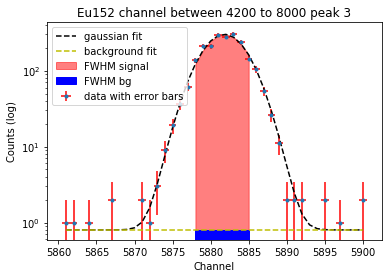

In [142]:
# Guessed values for [A, mu, sigma, a, b]
A = 300     
mu = 5883   # guessed peak
sigma = 2.5 
a = 4620
b = 0.8
range_bg = count2[5800:5850]

solu, cov = curve_fit(gaussian, Channel_range_peak3, Count_range_peak3, p0 = [A, mu, sigma, a, b])

# Fitted values for [A, mu, sigma, a, b]
A_fit = solu[0]
mu_fit = solu[1]
sigma_fit = solu [2]
a_fit = solu[3]
b_fit = solu[4]

# Print fitted values
print('Fit value for A is: {:.3f}, for mu is: {:.3f}, for sigma is: {:.3f}, for a is: {:.3f} and for b is: {:.3f} '
      .format(A_fit, mu_fit, sigma_fit, a_fit, b_fit))
print('')
FWHM = 2*((2*np.log(2))**0.5)*sigma_fit
print('FWHM value = {:.3f}'.format(FWHM))
print('')

# Print the gaussian fit and the data
#plt.plot(Channel_range_peak3,  gaussian(Channel_range_peak3, A_fit, mu_fit, sigma_fit, a_fit, b_fit), 'k--', label = 'Fitted peak model')

# Each chaannel separated by a 0.5 keV window so we can assume 0.5 error on channel
# Channel number = Energy/0.2393 + 0.2462
error_channel = 0.5
error_counts_3 = Count_range_peak3**0.5
#plt.errorbar(Channel_range_peak3, Count_range_peak3,  error_counts_3, error_channel, fmt = '.',  ecolor = 'r', label = 'error bars')

# Total number of counts
# Peak region
# FWHM approx. region
peak_reg = list(count2)[list(channel2).index(int(mu_fit)-int(FWHM/2)-1):list(channel2).index(int(mu_fit)+int(FWHM/2)+1)]
C = sum(peak_reg)
print('C = ', C)
print('')

# Counts bg
avg_bg = sum(range_bg)/len(range_bg)
B = avg_bg*len(peak_reg)
print('B = ', B)
print('')

# Net number of counts
N = C - B
print('Net number of counts = {:.1f}'.format(N))

fill_reg = list(channel2)[int(mu_fit)-int(FWHM/2)-1:(int(mu_fit)+int(FWHM/2)+1)]
y2_fill = b_fit

plt.semilogy(Channel_range_peak3,gaussian(Channel_range_peak3, A_fit, mu_fit, sigma_fit, a_fit, b_fit), 'k--', label = 'gaussian fit')
plt.semilogy(Channel_range_peak3,[y2_fill]*len(Channel_range_peak3), 'y--', label = 'background fit')
plt.fill_between(fill_reg,gaussian(fill_reg, A_fit, mu_fit, sigma_fit, a_fit, b_fit), y2_fill, color='r', label = 'FWHM signal', alpha = 0.5)
plt.fill_between(fill_reg, y2_fill, color='b', label = 'FWHM bg')
plt.errorbar(Channel_range_peak3, Count_range_peak3,  error_counts_3, error_channel, fmt = '.',  ecolor = 'r', label = 'data with error bars')

plt.title('Eu152 channel between 4200 to 8000 peak 3')
plt.xlabel('Channel')
plt.ylabel('Counts (log)')
plt.legend()
plt.savefig("Eu152_4200_8000_peak3.png")
plt.show()

#### Critical Limit

In [143]:
# The critical limit for a confidence og 95% is given by:
Lc = 1.645*(2*B)**0.5
print('Critical Limit (Lc) = {:.3f}'.format(Lc))
print('')
print('As N > Lc - because {:.3f} > {:.3f}'.format(N, Lc))
print('')

#Confidence Limit
Sigma_N = (N + 2*B)**0.5
Conf_lim_err = 1.645*Sigma_N
print('Then the confidence limit = {:.3f} +/- {:.3f}'.format(N, Conf_lim_err))

Critical Limit (Lc) = 5.885

As N > Lc - because 1727.600 > 5.885

Then the confidence limit = 1727.600 +/- 68.626


#### Detection Limit

In [144]:
# for Kα = Kβ = 1.645

Ld = 2.71 + 4.65*(B)**0.5

print('Detection limit = {:.3f}'.format(Ld))

Detection limit = 14.474


#### MDA

In [145]:
# To know efficiency we need to know the energy range of our peak
print('Energy range peak 3 between ' + str(list(Energy_range_peak3)[0]) + ' and ' + str(list(Energy_range_peak3)[-1]))

Energy range peak 3 between 1403.109877 and 1412.448025


In [146]:
# Knowing the energy range we know the efficiency of accelerator is between Energy_1332_0 and Energy_1836_1
eff_3 = 0.005067

# Live time for Eu152 (s)
t_Eu = 299.8

# Branching ratio assume f = 1
f = 1

# Minimum Detectable Activity
MDA = (Ld) / (t_Eu * eff_3 * f)

print('Minimum Detectable Activity = {:.3f} Bq'.format(MDA))

Minimum Detectable Activity = 9.528 Bq


## 1 to 800 range

In [147]:
# Data Range between 1 to 800

df_range = df_transposed.iloc[:800]
df_range.tail()

,Channel,Count,Energy
795,796.0,78.0,190.347816
796,797.0,70.0,190.587256
797,798.0,74.0,190.826696
798,799.0,80.0,191.066136
799,800.0,76.0,191.305575


In [148]:
# Channel only Range between 1 to 800
Channel_range = channel2[:800]

# Count only Range between 1 to 800
Count_range = count2[:800]

# Energy only Range between 1 to 800
Energy_range = energy2[:800]

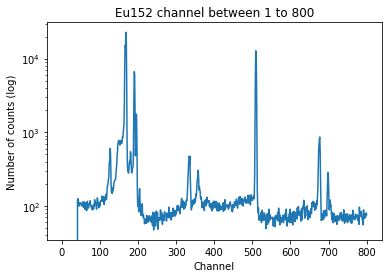

<Figure size 432x288 with 0 Axes>

In [149]:
plt.semilogy(Channel_range, Count_range)
plt.title('Eu152 channel between 1 to 800')
plt.xlabel('Channel')
plt.ylabel('Number of counts (log)')
plt.show()
plt.savefig("Eu152_1_800.png")

#### Single strongest peak

In [157]:
# Peak 1
Channel_range_peak = channel2[500:520]
Count_range_peak = count2[500:520]
Energy_range_peak = energy2[500:520]

In [158]:
# Guessed values for [A, mu, sigma, a, b]
A = 30000     
mu = 500   # guessed peak 
sigma = 150
a = 0.5
b = 100
range_bg = count2[400:480]    #guessed background

solu, cov = curve_fit(gaussian, Channel_range_peak, Count_range_peak, p0 = [A, mu, sigma, a, b])

# Fitted values for [A, mu, sigma, a, b]
A_fit = solu[0]
mu_fit = solu[1]
sigma_fit = solu [2]
a_fit = solu[3]
b_fit = solu[4]

# Print fitted values
print('Fit value for A is: {:.3f}, for mu is: {:.3f}, for sigma is: {:.3f}, for a is: {:.3f} and for b is: {:.3f} '
      .format(A_fit, mu_fit, sigma_fit, a_fit, b_fit))

# Print the gaussian fit and the data
#plt.plot(Channel_range_peak1,  gaussian(Channel_range_peak1, A_fit, mu_fit, sigma_fit, a_fit, b_fit), 'k--', label = 'Fitted peak model')

# Each chaannel separated by a 0.5 keV window so we can assume 0.5 error on channel
# Channel number = Energy/0.2393 + 0.2462
error_channel = 0.5
error_counts = Count_range_peak**0.5
#plt.errorbar(Channel_range_peak1, Count_range_peak1,  error_counts_1, error_channel, fmt = '.',  ecolor = 'r', label = 'data with error bars')

Fit value for A is: 13807.440, for mu is: 509.440, for sigma is: 1.094, for a is: 0.500 and for b is: 100.000 


FWHM value = 2.6

C =  32260.0

B =  413.1

Net number of counts N = 31846.9


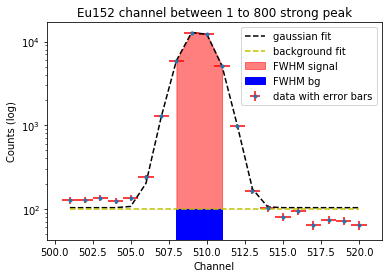

In [159]:
FWHM = 2*((2*np.log(2))**0.5)*sigma_fit
print('FWHM value = {:.1f}'.format(FWHM))
print('')

# Total number of counts
# Peak region
# FWHM approx. region
peak_reg = list(count2)[list(channel2).index(int(mu_fit)-int(abs(FWHM)/2)-1):list(channel2).index(int(mu_fit)+int(abs(FWHM)/2)+1)]
C = sum(peak_reg)
print('C = ', C)
print('')
# Counts bg
avg_bg = sum(range_bg)/len(range_bg)
B = avg_bg*len(peak_reg)
print('B = ', round(B,3))
print('')
# Net number of counts
N = C - B
print('Net number of counts N = {:.1f}'.format(N))

fill_reg = list(channel2)[int(mu_fit)-int(FWHM/2)-1:(int(mu_fit)+int(FWHM/2)+1)]
y2_fill = b_fit


plt.semilogy(Channel_range_peak,gaussian(Channel_range_peak, A_fit, mu_fit, sigma_fit, a_fit, b_fit), 'k--', label = 'gaussian fit')
plt.semilogy(Channel_range_peak,[y2_fill]*len(Channel_range_peak), 'y--', label = 'background fit')
plt.fill_between(fill_reg,gaussian(fill_reg, A_fit, mu_fit, sigma_fit, a_fit, b_fit), y2_fill, color='r', label = 'FWHM signal', alpha = 0.5)
plt.fill_between(fill_reg, y2_fill, color='b', label = 'FWHM bg')
plt.errorbar(Channel_range_peak, Count_range_peak,  error_counts, error_channel, fmt = '.',  ecolor = 'r', label = 'data with error bars')

plt.title('Eu152 channel between 1 to 800 strong peak')
plt.xlabel('Channel')
plt.ylabel('Counts (log)')
plt.legend()
plt.savefig("Eu152_1_800_peak(1).png")
plt.show()

#### Critical Limit

In [160]:
# The critical limit for a confidence og 95% is given by:
Lc = 1.645*(2*B)**0.5
print('Critical Limit (Lc) = {:.3f}'.format(Lc))
print('')
print('As N > Lc - because {:.3f} > {:.3f}'.format(N, Lc))
print('')

#Confidence Limit
Sigma_N = (N + 2*B)**0.5
Conf_lim_err = 1.645*Sigma_N
print('Then the confidence limit = {:.3f} +/- {:.3f}'.format(N, Conf_lim_err))

Critical Limit (Lc) = 47.283

As N > Lc - because 31846.900 > 47.283

Then the confidence limit = 31846.900 +/- 297.345


#### Detection Limit

In [161]:
# for Kα = Kβ = 1.645

Ld = 2.71 + 4.65*(B)**0.5

print('Detection limit = {:.3f}'.format(Ld))

Detection limit = 97.221


#### MDA

In [162]:
# To know efficiency we need to know the energy range of our peak
print('Energy range strong peak between ' + str(list(Energy_range_peak)[0]) + ' and ' + str(list(Energy_range_peak)[-1]))

Energy range strong peak between 119.7131062 and 124.2624604


In [163]:
# Knowing the energy range we know the efficiency of accelerator
eff = 0.047077

# Live time for Eu152 (s)
t_Eu = 299.8

# Branching ratio assume f = 1
f = 1

# Minimum Detectable Activity
MDA = (Ld) / (t_Eu * eff * f)

print('Minimum Detectable Activity = {:.3f} Bq'.format(MDA))

Minimum Detectable Activity = 6.888 Bq
